# Extension of Nature's Rx Study

## Introduction
In our previous study (Nature's Rx, available at [Link](https://github.com/shuting2023/Natures_Rx/blob/main/src/data_analysis.ipynb)), we employed Spearman correlation to analyze the correlation between mental illness rate and various environmental features. Key findings included:
- All environmental features exhibited a modest correlation with the mental illness rate.
- Contrary to conventional expectations, higher levels of average greenness were associated with poorer mental health outcomes.
- There was significant correlation among environmental features themselves, suggesting potential confounding variables that could explain some counterintuitive results.

Given these insights, the current extension aims to delve deeper into the underlying causes of these correlations, particularly focusing on the surprising association between greenness and mental health.

## Objectives
The primary objective of this extension is to:
- Reassess and expand upon the initial findings by incorporating a broader set of urban features.
- Adjust data calculations to per capita metrics to standardize comparisons across diverse urban regions.
- Re-evaluate the role of outliers and confounders in influencing the observed correlations.

## Methodology
**Data Preparation**
- Data Loading: Import datasets required for the analysis.
- Data Cleaning: Address missing values, outliers, and data inconsistencies.
- Data Merging: Combine multiple datasets into a single, unified dataset for analysis.

**Exploratory Data Analysis**
- Correlation Analysis: Re-examine the correlations between mental illness rates and urban features, removing outliers to better assess their impact.
- Baseline Model Setup: Establish baseline models to provide reference R² scores, facilitating the evaluation of the impact of additional variables introduced in the models.

**Statistical Modeling**
- Multiple Regression Analysis: Implement multiple regression to control for potential confounding variables, thereby isolating the effects of specific environmental features on mental health.
- Mediation Analysis: Conduct mediation analysis to explore whether certain variables mediate the relationship between greenness and mental health outcomes.

## Data Preparation

Load and clean the mental health and green space datasets. After cleaning, merge the two datasets and report any limitations encountered.

In [1]:
import modules as m

In [2]:
# load and clean mental health data
mhdf = m.clean_mh_data('data/raw/mh_cleaned.csv')
mhdf.head(2)

,StateAbbr,PlaceName,MHLTH_AdjPrev
0,AL,Birmingham,15.6
1,AL,Hoover,10.4


`MHLTH_AdjPrev`: This represents the age-adjusted prevalence of respondents aged 18 years or older who reported experiencing 14 or more days in the past 30 days during which their mental health was not good.


In [3]:
# Interested features from the Urban Centre dataset
baisc_info = [
    'ID_HDC_G0', # unique ID of the Urban Centre
    'GCPNT_LAT', # Geometric Centroid (WGS 84)
    'GCPNT_LON', # Geometric Centroid (WGS 84)
    'UC_NM_MN', # Name of the Urban Centre
    'UC_NM_LST' # List of cities in the Urban Centre
    ] 

numerical_cols = ['EL_AV_ALS', # Elevation above sea level (m)
    'E_WR_P_14', # Average precipitation for epoch 2014
    'E_WR_T_14', # Average temperature for epoch 2014
    # 'B15', # Total built-up area in 2015
    'P15', # Total resident population in 2015
    'BUCAP15', # Surface of the built-up area per person in 2015
    'NTL_AV', # Average night time light emission in 2015
    'GDP15_SM', # Sum of GDP PPP values for year 2015, leave here for computing avg GDP
    'TT2CC', # Travel time to country capital
    'E_GR_AV14', # Average greenness estimated for 2014 located in the built-up area of epoch 2014
    'E_GR_AH14', # Total area of the high green estimated for 2014
    'E_GR_AM14', # Total area of the medium green estimated for 2014
    'E_GR_AL14', # Total area of the low green estimated for 2014
    'E_GR_AT14', # Total area of green estimated for 2014
    'E_EC2E_E15', # Total emission of CO2 from the energy sector, using non-short-cycle-organic fuels in 2015
    'E_EC2E_R15', # Total emission of CO2 from the residential sector, using non-short-cycle-organic fuels in 2015
    'E_EC2E_I15', # Total emission of CO2 from the industry sector, using non-short-cycle-organic fuels in 2015
    'E_EC2E_T15', # Total emission of CO2 from the transport sector, using non-short-cycle-organic fuels in 2015
    'E_EC2E_A15', # Total emission of CO2 from the agriculture sector, using non-short-cycle-organic fuels in 2015
    'E_EC2O_E15', # Total emission of CO2 from the energy sector, using short-cycle-organic fuels in 2015
    'E_EC2O_R15', # Total emission of CO2 from the residential sector, using short-cycle-organic fuels in 2015
    'E_EC2O_I15', # Total emission of CO2 from the industry sector, using short-cycle-organic fuels in 2015
    'E_EC2O_T15', # Total emission of CO2 from the transport sector, using short-cycle-organic fuels in 2015
    'E_EC2O_A15', # Total emission of CO2 from the agriculture sector, using short-cycle-organic fuels in 2015
    'E_EPM2_E15', # Total emission of PM2.5 from the energy sector in 2015
    'E_EPM2_R15', # Total emission of PM2.5 from the residential sector in 2015
    'E_EPM2_I15', # Total emission of PM2.5 from the industry sector in 2015
    'E_EPM2_T15', # Total emission of PM2.5 from the transport sector in 2015
    'E_EPM2_A15', # Total emission of PM2.5 from the agriculture sector in 2015
    'E_CPM2_T14', # Total concertation of PM2.5 for reference epoch 2014
    'EX_FD_AREA', # Total surface potentially exposed to floods
    'EX_FD_B15', # Total built-up area potentially exposed to floods in 2015
    'EX_FD_P15', # Total resident population potentially exposed to floods in 2015
    'EX_SS_AREA', # Total surface potentially exposed to storm surges
    'EX_SS_B15', # Total built-up area potentially exposed to storm surges in 2015
    'EX_SS_P15', # Total resident population potentially exposed to storm surges in 2015
    'SDG_LUE9015', # Land use efficiency 1990-2015
    'SDG_A2G14', # Share of population living in the high green area in 2015
    'SDG_OS15MX' # Percentage of the open spaces
]

# combination of all interested features
inital_col = baisc_info + numerical_cols
gsdf =  m.clean_gs_data('data/raw/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.csv', inital_col)
print(gsdf.shape)
gsdf.head(2)

In [5]:
# checking invalid format
m.check_string_format(gsdf)

UC_NM_MN 3


,ID_HDC_G0,GCPNT_LAT,GCPNT_LON,UC_NM_MN,UC_NM_LST,EL_AV_ALS,E_WR_P_14,E_WR_T_14,P15,BUCAP15,...,E_CPM2_T14,EX_FD_AREA,EX_FD_B15,EX_FD_P15,EX_SS_AREA,EX_SS_B15,EX_SS_P15,SDG_LUE9015,SDG_A2G14,SDG_OS15MX
482,483,38.777312,-90.611861,O?Fallon,O?Fallon; Saint Charles; Saint Peters; Cottlev...,163.0952796,1057.825027,13.77023435,2.376946e+05,436.970344,...,11.338700,15.0,10.457041,16734.02483,0.0,0.0,0.0,1.532844781,0.790093,75.6
553,554,44.999947,-93.230120,Minneapolis [Saint Paul],Minneapolis; Saint Paul,270.2477606,843.4500122,8.145532727,1.733145e+06,485.288523,...,10.163495,208.0,134.763916,265616.51160,0.0,0.0,0.0,1.431409186,0.731324,72.23
763,764,42.235051,-83.615301,CharterÿTownship of Ypsilanti,CharterÿTownship of Ypsilanti; City of Ypsilanti,232.3133646,875.4750214,10.1181035,6.798538e+04,448.090225,...,12.107350,0.0,0.000000,0.00000,0.0,0.0,0.0,3.497932736,0.741918,71.16


UC_NM_LST 2


,ID_HDC_G0,GCPNT_LAT,GCPNT_LON,UC_NM_MN,UC_NM_LST,EL_AV_ALS,E_WR_P_14,E_WR_T_14,P15,BUCAP15,...,E_CPM2_T14,EX_FD_AREA,EX_FD_B15,EX_FD_P15,EX_SS_AREA,EX_SS_B15,EX_SS_P15,SDG_LUE9015,SDG_A2G14,SDG_OS15MX
482,483,38.777312,-90.611861,O?Fallon,O?Fallon; Saint Charles; Saint Peters; Cottlev...,163.0952796,1057.825027,13.77023435,237694.57140,436.970344,...,11.33870,15.0,10.457041,16734.02483,0.0,0.0,0.0,1.532844781,0.790093,75.6
763,764,42.235051,-83.615301,CharterÿTownship of Ypsilanti,CharterÿTownship of Ypsilanti; City of Ypsilanti,232.3133646,875.4750214,10.1181035,67985.37723,448.090225,...,12.10735,0.0,0.000000,0.00000,0.0,0.0,0.0,3.497932736,0.741918,71.16


In [6]:
# clean the format
gsdf = m.format_clean(gsdf)

# double check again
m.check_string_format(gsdf)

In [7]:
# apply state label
gsdf = m.label_state(gsdf)
gsdf.head(2)

,ID_HDC_G0,GCPNT_LAT,GCPNT_LON,UC_NM_MN,UC_NM_LST,EL_AV_ALS,E_WR_P_14,E_WR_T_14,P15,BUCAP15,...,EX_FD_AREA,EX_FD_B15,EX_FD_P15,EX_SS_AREA,EX_SS_B15,EX_SS_P15,SDG_LUE9015,SDG_A2G14,SDG_OS15MX,State
0,1,21.340678,-157.893497,Honolulu,Honolulu; Waipahu; Pearl City; Aiea,52.29643514,741.6250153,23.5266223,512853.6667,157.252219,...,0.0,0.0,0.0,161.0,69.95092,444041.5295,0.074385203,0.226415,56.41,HI
2,3,34.923123,-120.434372,Santa Maria,Santa Maria,87.12809223,245.1750011,14.71819115,123181.2848,340.967420,...,0.0,0.0,0.0,0.0,0.00000,0.0000,0.481144026,0.040129,23.64,CA


In the following cell, I will calculate the average for all variables that represent a total value of an urban center per population, making them more comparable from one urban center to another. For instance, it's impractical to compare a megacity with a population of 100,000 to a small urban town of 10,000.

In [8]:
no_avg_cols = ['EL_AV_ALS', 'E_WR_P_14', 'E_WR_T_14', 'P15','NTL_AV','BUCAP15','TT2CC','E_GR_AV14','SDG_A2G14','SDG_OS15MX','SDG_LUE9015']

avg_cols = [x for x in numerical_cols if x not in no_avg_cols]

gsdf, new_cols = m.avg_per_person(gsdf, avg_cols)

gsdf.head(2)

,ID_HDC_G0,GCPNT_LAT,GCPNT_LON,UC_NM_MN,UC_NM_LST,EL_AV_ALS,E_WR_P_14,E_WR_T_14,P15,BUCAP15,...,E_EPM2_I15_AV,E_EPM2_T15_AV,E_EPM2_A15_AV,E_CPM2_T14_AV,EX_FD_AREA_AV,EX_FD_B15_AV,EX_FD_P15_AV,EX_SS_AREA_AV,EX_SS_B15_AV,EX_SS_P15_AV
0,1,21.340678,-157.893497,Honolulu,Honolulu; Waipahu; Pearl City; Aiea,52.29643514,741.6250153,23.5266223,512853.6667,157.252219,...,0.000340,0.000046,9.268442e-08,0.000011,0.0,0.0,0.0,0.000314,0.000136,0.865825
2,3,34.923123,-120.434372,Santa Maria,Santa Maria,87.12809223,245.1750011,14.71819115,123181.2848,340.967420,...,0.000285,0.000024,3.832931e-07,0.000094,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [9]:
# combine all numeric column names together
num_cols = new_cols + no_avg_cols

# conevert all columns to float
gsdf = m.convert_to_float(gsdf, num_cols)

In the following cell, I will merge the mental health dataset with the green space dataset based on city names and states. However, there are some challenges:

The Green Space DataFrame categorizes areas at the urban center level, which groups multiple neighboring cities together, whereas the Mental Health DataFrame lists each city on a separate row. To align these datasets, it is necessary to 'explode' the list of cities in the Green Space DataFrame to individual rows. Subsequently, the two DataFrames will be matched based on the 'State' and 'PlaceName' columns. Finally, we will calculate the average mental health value for each urban center. Finally, I will calculate the average mental health value for each urban center.

In [11]:
df = m.merge_mh_gs(gsdf, mhdf)
df.head(2)


(238, 43)


This method creates a potential bias in this research. This is because not all cities from the Mental Health dataset align with the cities listed in the Green Space dataset. As a result, the average mental illness rate calculated may not accurately represent each urban center. This discrepancy could potentially affect the correlations and coefficients between urban features and mental illness rates. To resolve this issue, further research should be conducted, such as obtaining additional mental illness rate data for the unmatched cities.

In [13]:
# ouput to csv file
# df.to_csv('data/processed/gsmh_merged.csv', index = False)

## Exploratory Data Analysis

In this section, I will re-examine the correlations between mental illness rates and urban features, focusing particularly on data after outlier removal. 

To focus on the most representative data and minimize the influence of extreme values, I will employ the standard deviation method. This approach retains data points that fall within three standard deviations from the mean, ensuring the analysis centers around more central data points.

This will be our baseline model to provide reference R² scores, enabling the evaluation of more advanced analytical models.


In [14]:
noout_corr = m.assemble_corr_df(df, num_cols + ['AVG_NGMH_ADJPREV'])
m.heatmap(noout_corr.T)

Baseline R2 Score: 0.03


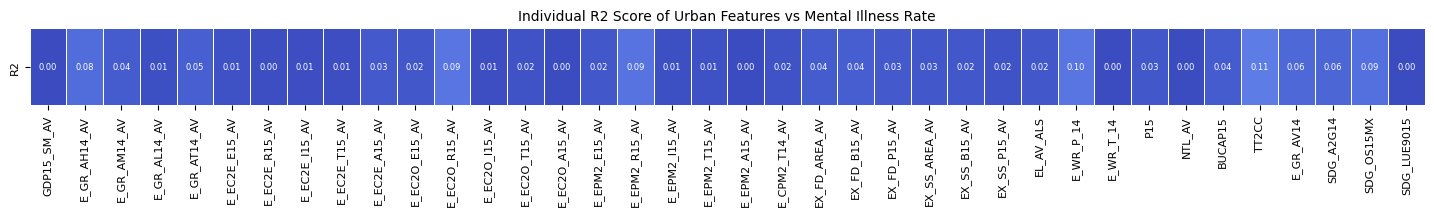

In [21]:
# Providing R2 score as a baseline
r2_df = m.r2_score_df(df, num_cols, 'AVG_NGMH_ADJPREV')

baseline_r2 = round(float(r2_df.values.mean()),2)

print(f'Baseline R2 Score: {baseline_r2}')
m.heatmap_r2(r2_df.T, title = 'Individual R2 Score of Urban Features vs Mental Illness Rate')

## Statistical Modeling

In our previous study, we suspected that confounders were influencing the correlation between mental illness rates and specific environmental features, resulting in a poor fit of the correlation model.

Therefore, I will conduct a multiple regression model to control for potential confounding variables, isolating the effects of specific urban features on mental illness. This approach will allow me to interpret a more meaningful relationship by analyzing its coefficients.

The r2 score of multiple regreesion 0.46 is higher than the baseline r2 score 0.03, indicating an improved model.


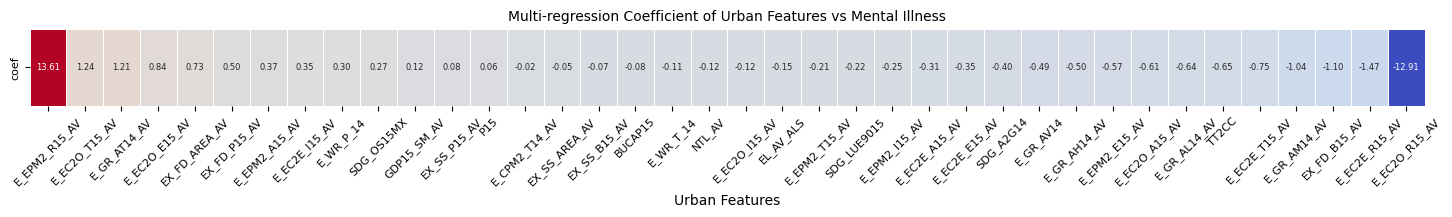

In [23]:
scaled_df = m.extract_normalize(df, num_cols + ['AVG_NGMH_ADJPREV'])
ngmh_df, r2_score_multi_reg = m.multi_linear_reg(scaled_df, num_cols, 'AVG_NGMH_ADJPREV')

if r2_score_multi_reg > baseline_r2:
    print(f'The r2 score of multiple regreesion {round(r2_score_multi_reg,2)} is higher than the baseline r2 score {baseline_r2}, indicating an improved model.')
else:
    print(f'The r2 score of multiple regreesion {round(r2_score_multi_reg,2)} is lower than the baseline r2 score {baseline_r2}, indicating an worse model.')

m.heatmap(ngmh_df.T, figsize=(18,1),title = 'Multi-regression Coefficient of Urban Features vs Mental Illness')


I will only consider coefficients that are more significant, i.e., those with an absolute value greater than 1.

**Nagative coefficient** \
The lower the coefficient, the better the mental health. 
- E_EPM2_R15_AV: Average emission of PM2.5 per person from the residential sector (Energy for buildings and waste) in 2015.
- E_EC2O_T15_AV: Average emission of CO2 per person from the transport sector in 2015.
- E_GR_AT14_AV: Avrage area of greenness per person estimated for 2015, located the area of the
- Urban Centre of 2015, and expressed in square kilometres.

**Positive Coefficent** \
The higher the coefficient, the worse the mental health.
- E_EC2O_R15_AV: Average emission of C2O per person from the residential sector (Energy for buildings and waste) in 2015.
- E_EC2E_R15_AV: Average emission of CO2 per person from the residential sector in 2015.
- EX_FD_B15_AV: Average built-up area exposure to floods per person in 2015. i.e., the average built-up area
in 2015 of the Urban Centre (of 2015) potentially exposed to floods, expressed in squares kilometres.
- E_GR_AM14_AV: Average area of the medium green (corresponding to shrubs or agriculture) per person estimated for 2015, located the area of the Urban Centre of 2015, and
expressed in square kilometres

**Findings:**
1. It is surprising how the emissions of PM2.5 `E_EPM2_R15_AV` and CO2 `E_EC2O_R15_AV` in residential areas can have such different impacts on mental illness. Further research could investigate the sources contributing to PM2.5 and CO2 levels in these areas and propose specific recommendations.
2. Why does the average area of greenness per person `E_GR_AT14_AV` have a positive correlation with mental illness? Could there be other mediators? A further multiple regression analysis on this feature is necessary.
3. Why does average built-up exposure to floods `EX_FD_B15_AV` correlate with lower mental illness? This observation necessitates additional multiple regression analysis to understand the underlying factors.

In order to address the questions outlined above, I will conduct separate multiple regression analyses on `E_GR_AT14_AV` and `EX_FD_B15_AV` to identify potential explanations for the observed phenomena.

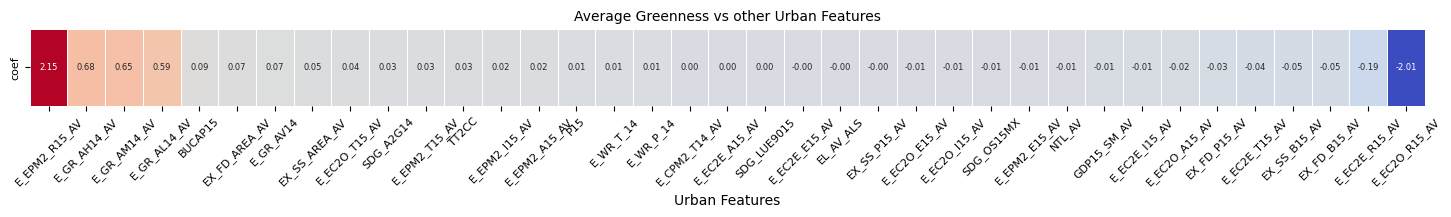

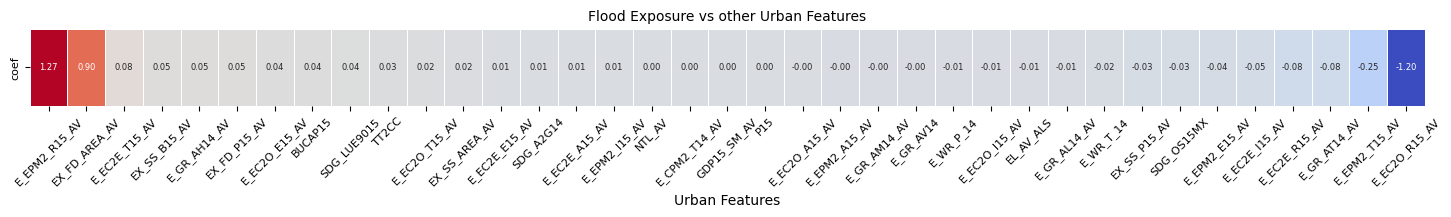

In [18]:
m.one_func_multi_reg_urban(num_cols, 'E_GR_AT14_AV', scaled_df, title = 'Average Greenness vs other Urban Features')
m.one_func_multi_reg_urban(num_cols, 'EX_FD_B15_AV', scaled_df, title = 'Flood Exposure vs other Urban Features')

It appears that PM2.5 `E_EPM2_R15_AV` and CO2 `E_EC2O_R15_AV` have strong, yet opposite, effects on both average greenness and exposure to floods. This observation raises the question: Are PM2.5 and CO2 the primary influencers on mental illness, with other urban features affecting mental illness through these two pollutants? Are they acting as mediators?

To address this query, I will conduct two separate mediation analyses: one between PM2.5 and average greenness, and another between CO2 and exposure to floods, determining whether PM2.5 and CO2 are indeed functioning as mediators.

In [19]:
# mediation analysis on whether PM2.5 is the mediator between greenness and mental health
m.mediation_analysis(scaled_df,'E_GR_AT14_AV','E_EPM2_R15_AV', 'AVG_NGMH_ADJPREV')

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.010356,-0.041432,0.066803,0.706
ACME (treated),0.010356,-0.041432,0.066803,0.706
ADE (control),0.257110,0.099000,0.401758,0.000
ADE (treated),0.257110,0.099000,0.401758,0.000
Total effect,0.267467,0.115799,0.408145,0.000
Prop. mediated (control),0.034259,-0.181935,0.302349,0.706
Prop. mediated (treated),0.034259,-0.181935,0.302349,0.706
ACME (average),0.010356,-0.041432,0.066803,0.706
ADE (average),0.257110,0.099000,0.401758,0.000
Prop. mediated (average),0.034259,-0.181935,0.302349,0.706


- ACME (Average Causal Mediation Effect): The null hypothesis posits that the mediator does not transmit any effect from the independent variable (IV) to the dependent variable (DV). For PM2.5, the p-value is higher than 0.05, meaning PM2.5 has no effect from average greenness to mental illness.

- ADE (Average Direct Effect): The null hypothesis states that there is no direct effect of the IV on the DV that bypasses the mediator. Here, we obtained a significant p-value, indicating that there are direct effect of the average greenness on the mental illness.

- Total Effect: The null hypothesis suggests that the IV has no overall effect on the DV, combining both direct and mediated pathways. The effect size is significant, indicating average greenness has overall effect on mental illness.

- Proportion Mediated: The null hypothesis for Proportion Mediated asserts that the mediator does not contribute to the effect of the IV on the DV. Given that the p-value is high, indicating the PM2.5 does not contribute any effect.

Overall, the results unfortunately indicate that higher average greenness is associated with worse mental health outcomes.

In [20]:
# mediation analysis on whether CO2 is the mediator between expose to flood and mental health
m.mediation_analysis(scaled_df, 'EX_FD_B15_AV', 'E_EC2O_R15_AV', 'AVG_NGMH_ADJPREV')

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.004690,-0.019377,0.031678,0.664
ACME (treated),0.004690,-0.019377,0.031678,0.664
ADE (control),0.256070,0.062469,0.441195,0.008
ADE (treated),0.256070,0.062469,0.441195,0.008
Total effect,0.260760,0.066424,0.441264,0.008
Prop. mediated (control),0.012469,-0.111895,0.138336,0.664
Prop. mediated (treated),0.012469,-0.111895,0.138336,0.664
ACME (average),0.004690,-0.019377,0.031678,0.664
ADE (average),0.256070,0.062469,0.441195,0.008
Prop. mediated (average),0.012469,-0.111895,0.138336,0.664


Similar to the results above, the higher p-value of ACME indicates that CO2 does not transmit any effect from flood exposure to mental illness. Conversely, the lower p-value of ADE suggests that exposure to floods has a direct effect on mental health. Additionally, the higher p-value of Proportion Mediated indicates that CO2 does not contribute any effect to this relationship.

Overall, the results support the conclusion that higher exposure to floods leads to better mental health.

## Conclusion

As we conclude this phase of our exploration, it’s important to recognize the intriguing, albeit sometimes counterintuitive, findings from our study. We observed that higher levels of PM2.5 in residential areas and greater average total greenness per person are associated with worsening mental health. Conversely, exposure to floods and higher CO2 emissions appear to have a beneficial effect on mental health. These results may initially seem paradoxical and certainly warrant a deeper investigation.

Several factors could contribute to these unexpected outcomes. One potential explanation relates to the discrepancies in our data sources, as discussed in the merging section of our analysis. The green space data was aggregated over larger urban centers encompassing multiple cities, whereas our mental health data was collected at a city-specific level, possibly leading to gaps in data coverage and precision. Additionally, the complex nature of mental health, influenced by a myriad of factors beyond mere urban environmental features, suggests that mental illness cannot be simplistically attributed to observable urban elements alone.

It is crucial to remember that correlation does not imply causation. While our findings open new avenues for understanding environmental impacts on mental health, they do not necessarily pinpoint solutions or cures for mental health issues. Each observed relationship serves as a starting point for further research, not a conclusive endpoint.

Reflecting on the journey, the process of engaging in extensive Exploratory Data Analysis (EDA), applying statistical modeling, and challenging my own assumptions has been immensely enriching. Setting benchmarks and progressively enhancing our model's performance has not only advanced this project but also deepened my appreciation for the nuanced discipline of data science.

Through this project, I have grown both professionally and personally, learning to embrace the complexities of real-world data and the subtleties of interpreting statistical findings. The journey of discovery does not end here but rather opens up new questions and pathways for exploration, underscoring the dynamic and evolving nature of data science.